By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/12

Videos:
* [[10分鐘搞懂機器學習] 8.9 梯度提升迴歸樹 Gradient Boosted Regression Trees (GBRT)、Gradient Boosting Machines (GBM)](https://youtu.be/cJXMRvg-iU4w)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


y 的平均值: 1.0615094787369856


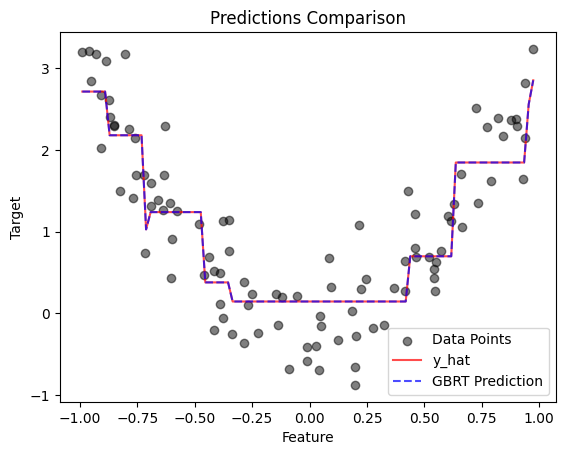

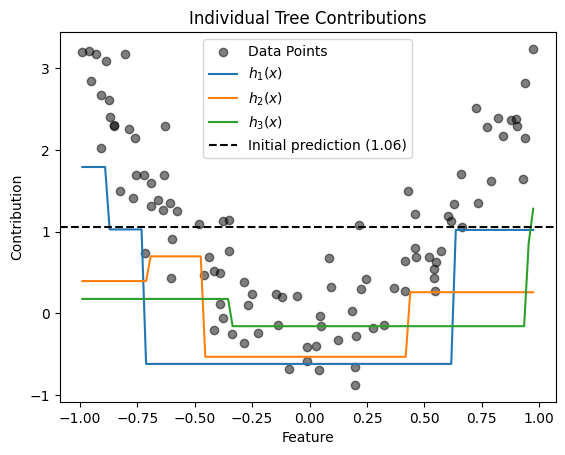

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
# Generate synthetic data
X = 2 * np.random.rand(100, 1) - 1
y = 3 * X**2 + 0.5 * np.random.randn(100, 1)

# Create and fit the model
max_depth = 2
n_estimators = 3
learning_rate = 0.7

model = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators,
                                 learning_rate=learning_rate, random_state=42)
model.fit(X, y.ravel())

# Generate data for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# 獲取每棵樹
tree1 = model.estimators_[0, 0]
tree2 = model.estimators_[1, 0]
tree3 = model.estimators_[2, 0]

# 正確計算預測值
initial_prediction = model.init_.constant_[0]  # 獲取初始預測值

# 计算 y 的平均值
y_mean = np.mean(y)
print("y 的平均值:", y_mean)


y_hat = (initial_prediction +
         learning_rate * tree1.predict(X_plot) +
         learning_rate * tree2.predict(X_plot) +
         learning_rate * tree3.predict(X_plot))

# 繪製圖形

# 第一個圖：最終預測結果比較
plt.scatter(X, y, color='black', label='Data Points', alpha=0.5)
plt.plot(X_plot, y_hat, 'r-', label='y_hat', alpha=0.7)
plt.plot(X_plot, model.predict(X_plot), 'b--', label='GBRT Prediction', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Predictions Comparison')
plt.legend()
plt.show()

# 第二個圖：各別樹的貢獻
plt.scatter(X, y, color='black', label='Data Points', alpha=0.5)
plt.plot(X_plot, tree1.predict(X_plot), label=r'$h_1(x)$')
plt.plot(X_plot, tree2.predict(X_plot), label=r'$h_2(x)$')
plt.plot(X_plot, tree3.predict(X_plot), label=r'$h_3(x)$')
plt.axhline(y=initial_prediction, color='k', linestyle='--',
           label=f'Initial prediction ({initial_prediction[0]:.2f})')
plt.xlabel('Feature')
plt.ylabel('Contribution')
plt.title('Individual Tree Contributions')
plt.legend()
plt.show()



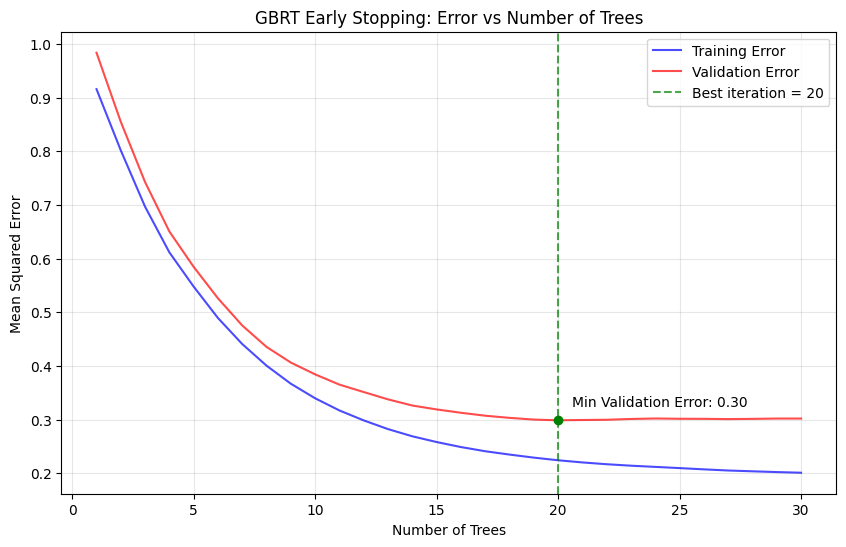

模型實際使用的樹的數量: 30
基於驗證集的最佳迭代次數: 20
最佳迭代時的訓練誤差: 0.2244
最佳迭代時的驗證誤差: 0.2989


GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=20,
                          random_state=42)

In [ ]:
# 提供Python code，使用early stopping 決定 GBRT的n_estimators
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 設定隨機種子
np.random.seed(42)

# 生成示例數據
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
# Generate synthetic data
n_samples=600
X = 2 * np.random.rand(n_samples, 1) - 1
y = 3 * X**2 + 0.5 * np.random.randn(n_samples, 1)
y = y.ravel()
# 將數據分為訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 設定GBRT模型
n_estimators = 1000
gbrt = GradientBoostingRegressor(
    n_estimators=n_estimators,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,  # 如果驗證分數在10次迭代內沒有改善，則停止
    tol=1e-4             # 改善的容忍度
)

# 訓練模型
gbrt.fit(X_train, y_train)

# 計算訓練和驗證誤差
train_errors = []
val_errors = []

for y_train_pred in gbrt.staged_predict(X_train):
    train_errors.append(mean_squared_error(y_train, y_train_pred))

for y_val_pred in gbrt.staged_predict(X_val):
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# 找出最佳迭代次數
best_iter = np.argmin(val_errors) + 1

# 繪製結果
plt.figure(figsize=(10, 6))
iterations = np.arange(1, len(train_errors) + 1)

plt.plot(iterations, train_errors, 'b-', label='Training Error', alpha=0.7)
plt.plot(iterations, val_errors, 'r-', label='Validation Error', alpha=0.7)

# 標示最佳迭代點
plt.axvline(x=best_iter, color='g', linestyle='--', alpha=0.7,
            label=f'Best iteration = {best_iter}')

plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('GBRT Early Stopping: Error vs Number of Trees')
plt.legend()
plt.grid(True, alpha=0.3)

# 添加最佳點的標註
min_val_error = min(val_errors)
plt.plot(best_iter, min_val_error, 'go')
plt.annotate(f'Min Validation Error: {min_val_error:.2f}',
            xy=(best_iter, min_val_error),
            xytext=(10, 10),
            textcoords='offset points')

plt.show()

# 輸出結果
print(f"模型實際使用的樹的數量: {gbrt.n_estimators_}")
print(f"基於驗證集的最佳迭代次數: {best_iter}")
print(f"最佳迭代時的訓練誤差: {train_errors[best_iter-1]:.4f}")
print(f"最佳迭代時的驗證誤差: {val_errors[best_iter-1]:.4f}")

# 建立並訓練使用最佳迭代次數的最終模型
final_gbrt = GradientBoostingRegressor(
    n_estimators=best_iter,
    learning_rate=0.3,
    max_depth=5,
    random_state=42
)

final_gbrt.fit(X_train, y_train)